![task1](task1.png)

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [5]:
link = 'http://bit.ly/w-data'
df = pd.read_csv(link)

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


EDA Process

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we can see that the no missings values

The minimum hours spend is 1.1 and the max is 9.2

Let's check if the distribution of the data and the boxplot to check the for outliers

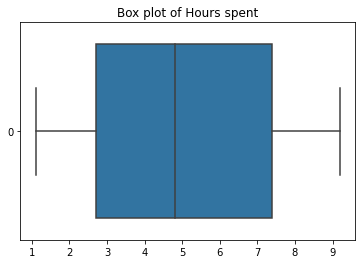

In [8]:

# Study hours
sns.boxplot(data=df.Hours, orient='h')
plt.title('Box plot of Hours spent')
plt.show()

There is no outliers

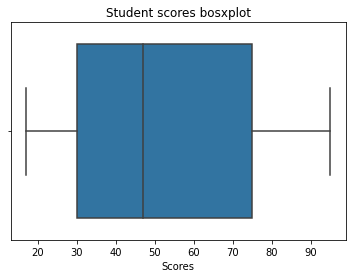

In [9]:
sns.boxplot(df.Scores, orient='v')
plt.title('Student scores bosxplot')
plt.show()

There is outliers

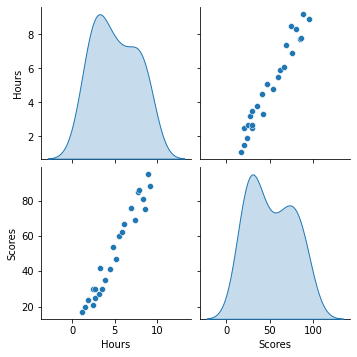

In [10]:
sns.pairplot(df, diag_kind="kde")

We can remark that the distribution of both the variables are follows bimodal distribution because they have two peeks each

We can see that there is a strong correlation between the two variables.

#### Building the linear Regression Model.

In [11]:
# Import the Linear Regression Model from sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = df.Hours
y = df.Scores

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model = LinearRegression()
model.fit(x_train.values.reshape((-1, 1)), y_train)

LinearRegression()

Evaluating the model

In [12]:
y_pred = model.predict(x_test.values.reshape((-1, 1)))

slope = model.coef_[0]
intercept = model.intercept_
print(f'The model score is {int(model.score(x_train.values.reshape((-1, 1)), y_train) * 100)} %')
print(f'The Intercept of the fitted line is {intercept}')
print(f'The slope of the fitted line is {slope}')
print(f'The equation line is y = {np.round(slope, 2)}*x + {np.round(intercept, 2)}')

error = mean_squared_error(y_test,y_pred)
print(f'\nThe Mean Square Error of the model is', error)


The model score is 95 %
The Intercept of the fitted line is 2.5121292983200902
The slope of the fitted line is 9.733307053186973
The equation line is y = 9.73*x + 2.51

The Mean Square Error of the model is 26.675642597052256


Text(0.5, 1.0, 'The best fitted line')

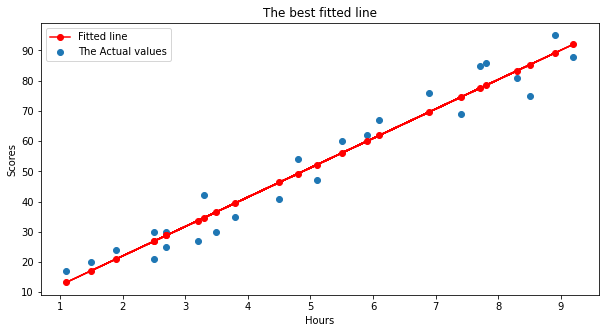

In [13]:
# Plotting the Regression line
plt.figure(figsize=(10, 5))
plt.plot(x, slope * x + intercept, 'ro-')
plt.scatter(x, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['Fitted line', 'The Actual values'])
plt.title('The best fitted line')

In [14]:
import math
x = np.array(9.25) # The given values of hours spent
prediction = model.predict(x.reshape((-1, 1)))
print(f'The Score of a student that spend 9.25 hours is {math.ceil(prediction[0])} out of 100')

The Score of a student that spend 9.25 hours is 93 out of 100
